# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team-14**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.
 
### Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying whether or not a person believes in climate change;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#two>3.1 Numerical and categorical features</a>

- <a href=#four>3.2 Null Values </a>

- <a href=#four>3.3 Descriptive analysis </a>

- <a href=#four>3.4 The target variable </a>

- <a href=#four>3.5 Feature variables </a>


<a href=#four>4. Data Engineering</a>

- <a href=#four>4.1 removing the web-urls</a>

- <a href=#four>4.2 Lowercase conversion </a>

- <a href=#four>4.3 Removing punctuation and special characters </a>

- <a href=#four>4.4 Lemmatization </a>

- <a href=#four>4.5 Removing Stop words </a>

- <a href=#four>4.6 Feature Extraction using CountVectorizer </a>

- <a href=#four>4.7 Preparing the test dataset </a>


<a href=#five>5. Modeling</a>


- <a href=#four>5.1 Logistic regression classification </a>

- <a href=#four>5.2 Decision Tree </a>

- <a href=#four>5.3 Random Forests</a>

- <a href=#four>5.4 Naive Bayes</a>

- <a href=#four>5.5 k nearest neighbuors </a>

- <a href=#four> </a>

- <a href=#four> </a>


<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section the necessary libraries that will be used throughout the anaylisis are imported.

---

!pip install wordcloud

In [1]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set plot style
sns.set()
import re
import string
import neattext.functions as nt
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from imblearn.over_sampling import SMOTE
from collections import Counter
from wordcloud import WordCloud
from textwrap import wrap


# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section the data is loaded from the `df_train` file.

---

In [2]:
pd.set_option('display.max_colwidth', None)
df_train = pd.read_csv('train.csv') # load the data
#df_test = pd.read_csv('test.csv') # load the data

In [3]:
# View dataset
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section,  an in-depth analysis of all the variables in the DataFrame is perfomed.

looking at:

-  Numerical and categorical features
-  Null values
-  Descriptive analysis 
-  The target variable 'sentiment'
-  Feature variables 'message'

###  3.1 Numerical and categorical features

Looking  at the method df.info(). This will provide the information about the data types of the variables, the number of variables and the non-null count for each variable.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Sentiment and tweetid columns contains numerical data, while clean_message contain Categorical data

###  3.2 Null Values

 Looking at the function df.isnull().sum(). This will give us information about which variables have null values.

In [5]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values present in all columns.

###  3.3 Descriptive analysis

To run summary statistics on columns containing `Numerical data`, we use `.describe()` function

In [6]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Summary statistics on `Categorical` column

In [7]:
df_train.describe(include='object')

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
freq,307


We notice that there are duplicates in message column, as shown by the unique row. These could be messages retweeted by different people.   

Possible solution would be to drop the duplicate columns. 

###  3.4 The target variable 'sentiment'

##### Class Description (Sentiments)

- 2 : News: the tweet links to factual news about climate change
- 1 : Pro: the tweet supports the belief of man-made climate change
- 0 : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1: Anti: the tweet does not believe in man-made climate change

In [8]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


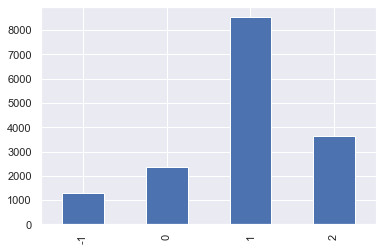

In [9]:
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

We can observe an imbalance with the class samples.

###  3.5 Feature variables 'message'

#### Words cloud of frequently twitted words

We will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [10]:
df_gm = df_train.copy()

In [11]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df_gm[df_gm.sentiment <= 1].index)

df_pro= df_gm.drop(df_gm[df_gm.sentiment<=0].index)
df_pro= df_gm.drop(df_gm[df_gm.sentiment>=2].index)

df_neutral= df_gm.drop(df_gm[df_gm.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df_gm[df_gm.sentiment>=1].index)

df_anti= df_gm.drop(df_gm[df_gm.sentiment>=0].index)

Text(0.5, 1.0, 'Anti Tweets')

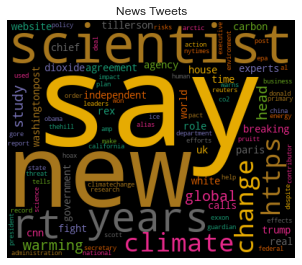

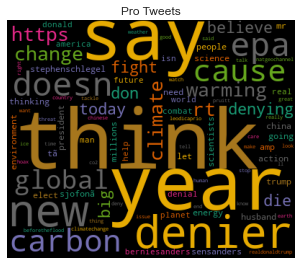

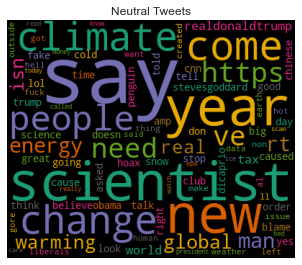

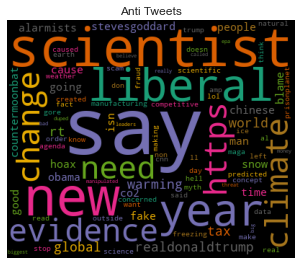

In [12]:
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")


## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the complex task of making raw data usable for the modeling phase. In this section we engineer the features such that they are ready for modelling


For our dataset, we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation and special characters
* removing mentions and retweets(`rt`)

### 4.1 removing the web-urls

In [13]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### 4.2 Lowercase conversion 

In [14]:
df_train['message'] = df_train['message'].str.lower()

### 4.3 Removing punctuation and special characters

We create a funcion that will remove the web-urls, punctuation, and mentions along with retweets(`rt`)

In [15]:
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

In [16]:
df_train['clean_message'] = df_train['message'].apply(data_cleaning)

In [17]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,it's not like we lack evidence of anthropogenic global warming


In case of special characters and extra whitespace, we employed NeatText 

In [18]:
# Remove special characters using NeatText
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_special_characters)

In [19]:
# Remove multiple whitespace between words
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_multiple_spaces)

In [20]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,it's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warming


In [21]:
df_train[['message','clean_message']].head()

,message,clean_message
0,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,it's not like we lack evidence of anthropogenic global warming,its not like we lack evidence of anthropogenic global warming
2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,researchers say we have three years to act on climate change before its too late urlweb urlweb
3,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb
4,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight


In [22]:
df_train = df_train.drop('message', axis=1)

In [23]:
df_train.head(2)

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,its not like we lack evidence of anthropogenic global warming


 ### 4.4 Lemmatization

Lemmatization will help in achieving the root forms (synonyms) of the words.

nltk.download(['wordnet','punkt','stopwords'])

In [24]:

lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_train['clean_message'] = df_train['clean_message'].apply(lemma, args=(lemmatizer, ))

df_train.head(2)


,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,it not like we lack evidence of anthropogenic global warming


### 4.5 Removing Stop words

#remove stop words
stop = stopwords.words('english')

df_train['clean_message']= df_train['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train.head()

### 4.6 Feature Extraction using CountVectorizer

In [25]:
X,y = df_train['clean_message'], df_train['sentiment']

In [26]:
X_list = []
for sentence in X:
        # converting the text to lower case
        sentence = sentence.lower()
        # appendi#ng to data_list
        X_list.append(sentence)

In [27]:
# Get bi-grams
vect_bi_gram = CountVectorizer(max_features=10000, ngram_range = (2, 2))
X2 = vect_bi_gram.fit_transform(X_list).toarray()
#scores = (X2.toarray())
#print("\n\nScores : \n", scores)
  
# Getting top ranking features
#sums = X2.sum(axis = 0)
#data1 = []
#for col, term in enumerate(features):
#    data1.append( (term, sums[0, col] ))
#ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
#words = (ranking.sort_values('rank', ascending = False))
#print ("\n\nWords : \n", words.head(7))

In [29]:
# Get tri-grams
vect_tri_gram = CountVectorizer(max_features=10000, ngram_range = (3, 3))
X3 = vect_tri_gram.fit_transform(X).toarray()

In [36]:
X3_features = vect_tri_gram.get_feature_names()

In [37]:
X3_features

['100 billion dollar',
 '100 country urlweb',
 '100 in the',
 '100 solution to',
 '109c on urlweb',
 '11 terrifying climate',
 '12 globalgoals are',
 '125 min on',
 '13 year old',
 '150 year of',
 '15c global warming',
 '15c if we',
 '170 billion are',
 '19 house republican',
 '1991 film warned',
 '20 are suing',
 '20 year cause',
 '2008 due to',
 '2009 called for',
 '20102017 so sad',
 '2016 more american',
 '2016 set to',
 '2016 wa pivotal',
 '2016 wa the',
 '2020 to get',
 '2030 half the',
 '21 kid in',
 '21 kid on',
 '22000000000 year on',
 '2322climate change mention',
 '280 billion year',
 '30 year ago',
 '30 year of',
 '40 of the',
 '40 year of',
 '44 of honey',
 '50 year of',
 '500m to un',
 '50m year dana',
 '60000 indian farmer',
 '70 degree in',
 '80 degree in',
 '800000 year of',
 '82 degree and',
 '82 percent of',
 '90 degree in',
 '91 degree in',
 '97 of climate',
 '97 of scientist',
 '98 of scientist',
 'abandoning climate change',
 'abc news urlweb',
 'abortion gay marr

# DONT RUN

The text feature extraction module called CountVectorizer is used to convert a collection of documents (rows of text) into a matrix of token counts.

# create vectorizer instance
vect = TfidfVectorizer() #CountVectorizer()

#fit vectorizer
vect.fit(df_train['clean_message'])

# NUM of predictors
print(len(vect.vocabulary_))

#transform features to numbers for modelling
vect_transform=vect.transform(df_train['clean_message'])

# Get shape of our predictive variables
vect_transform.shape

#total number of words in corpus
total_corpus=sum(vect_transform.toarray().sum(axis=0))
total_corpus

We can seee that there are a features, some of which correspond to words which only appear once. Not all of them are very useful, we must therefore tune vectorizer.

#betterVect = CountVectorizer(stop_words='english',max_features=10000) 
betterVect = TfidfVectorizer(stop_words='english',max_features=10000) 

betterVect.fit(df_train['clean_message'])

betterVect_transform=betterVect.transform(df_train['clean_message'])

# Get shape of our predictive variables
betterVect_transform.shape

#get total words in better corpus
total_better_corpus=sum(betterVect_transform.toarray().sum(axis=0))
total_better_corpus

#percentage of words used 
feature_percentage=round((total_better_corpus/total_corpus)*100)
feature_percentage

We will use 89 percent of the word in the total corpus.

#### Scaling

#scaling X

# define the scaler module
scaler = preprocessing.MinMaxScaler()

X_scaled=betterVect_transform.toarray()

# Scale data
X_scaled = scaler.fit_transform(X_scaled)

### 4.7 Balancing the classes

# CONTINUE

In [58]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [38]:
y

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [39]:

# split into input and output elements
#X=X_scaled
#y=df_train['sentiment']

# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# summarize distribution
#counter = Counter(y_train)
#for k,v in counter.items():
#    per = v / len(y) * 100
#    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#plt.bar(counter.keys(), counter.values())
#plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
model = RandomForestClassifier
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='fi_macro')
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = round(v / len(y) * 100,1)
    print('Class=%d, n=%d (%.1f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [40]:
# transform the dataset
oversample = SMOTE()

X_sample, y_sample = oversample.fit_resample(X_train, y_train)
# summarize distribution
#counter = Counter(y_sample)
#for k,v in counter.items():
#    per = v / len(y) * 100
#    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#plt.bar(counter.keys(), counter.values())
#plt.show()

### 4.7 Preparing the test dataset

In [63]:
df_test = pd.read_csv('test.csv')
#df_test.info()

In [64]:
#removing the web-urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Lowercase conversion
df_test['message'] = df_test['message'].str.lower()

#Removing punctuation and special characters
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

df_test['clean_message'] = df_test['message'].apply(data_cleaning)

# Remove special characters using NeatText
df_test['clean_message'] = df_test['clean_message'].apply(nt.remove_special_characters)


 ### 4.4 Lemmatization
lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_test['clean_message'] = df_test['clean_message'].apply(lemma, args=(lemmatizer, ))

#remove stop words
stop = stopwords.words('english')

df_test['clean_message']= df_test['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_test.head()



,message,tweetid,clean_message
0,europe will now be looking to china to make sure that it is not alone in fighting climate change… url-web,169760,europe looking china make sure alone fighting climate change urlweb
1,combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. url-web,35326,combine polling staffer climate change woman right fascist state urlweb
2,"the scary, unimpeachable evidence that climate change is already here: url-web #itstimetochange #climatechange @zeroco2_;..",224985,scary unimpeachable evidence climate change already urlweb itstimetochange climatechange
3,@karoli @morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax,476263,putin got jill trump doesnt believe climate change think hoax
4,rt @fakewillmoore: 'female orgasms cause global warming!'\n-sarcastic republican,872928,female orgasm cause global warmingsarcastic republican


In [65]:
df_test = df_test.drop('message', axis=1)
df_test.head(2)

,tweetid,clean_message
0,169760,europe looking china make sure alone fighting climate change urlweb
1,35326,combine polling staffer climate change woman right fascist state urlweb


In [66]:
X_list_test = []
for sentence in df_test.clean_message:
        # converting the text to lower case
        sentence = sentence.lower()
        # appendi#ng to data_list
        X_list_test.append(sentence)

In [68]:
feat_test = vect_bi_gram.transform(X_list_test).toarray()

In [69]:
feat_test.shape

(10546, 10000)

#Count Vectorizer

#betterVect_test = CountVectorizer(stop_words='english',max_features=10000)
betterVect_test = TfidfVectorizer(stop_words='english',max_features=10000)

vect_fit_test=betterVect_test.fit(df_test['clean_message'])

betterVect_transform_test=betterVect_test.transform(df_test['clean_message'])

feat_test=betterVect_transform_test.toarray()

#scaling
feat_test = scaler.fit_transform(feat_test)

feat_test

## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more classification models that are able to accurately predict our classes. 

These are the models that will created:



### 5.1 Multinomial NB

In [77]:

# create model object
#lr = LogisticRegression(multi_class='ovr',max_iter=200)
lr = MultinomialNB()
# train model
lr.fit(X_sample, y_sample)

MultinomialNB()

#### Checking outcomes on the testing set

In [78]:
#Generate predictions
y_pred = lr.predict(X_test)

y_pred=pd.DataFrame(y_pred)

In [79]:

print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.33      0.53      0.41       278
           1       0.32      0.44      0.37       425
           2       0.84      0.58      0.69      1755
           3       0.59      0.77      0.67       706

    accuracy                           0.60      3164
   macro avg       0.52      0.58      0.53      3164
weighted avg       0.67      0.60      0.62      3164



In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix

<function matplotlib.pyplot.show(close=None, block=None)>

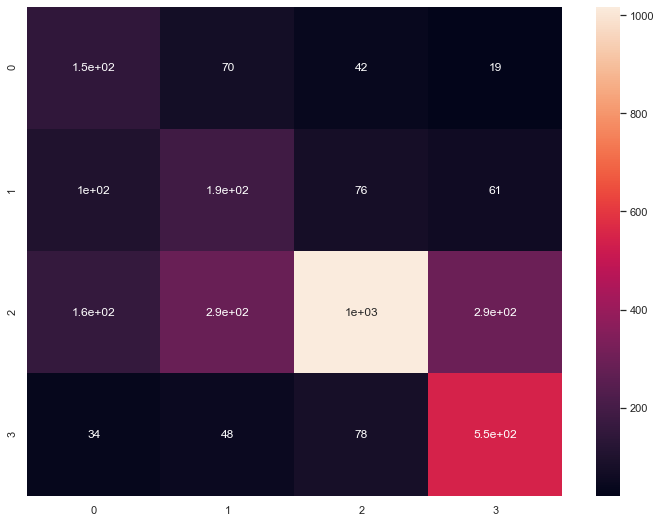

In [80]:
con_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,9))
sns.heatmap(con_mat, annot=True)
plt.show

#### Predictions on Test

### 5.2 Decision Tree

### 5.3 Random Forests

In [ ]:

# create model object
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Fit the model 
model.fit(X_train,y_train)

In [ ]:
# Train the model
pred_forest = model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, pred_forest))

### 5.4 Naive Bayes

In [ ]:

# Define the model 
naive_bayes = GaussianNB()

# Fit the model 
naive_bayes.fit(X_train, y_train)

#### Hyperparameter tuning

In [ ]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=10)}
gs_nb = GridSearchCV(estimator=naive_bayes, 
                 param_grid=params_nb,    
                 verbose=1, 
                 scoring='f1') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

In [ ]:
# Define the model 
naive_bayes_better = GaussianNB(var_smoothing=2.71828182846)
# Fit the model 
naive_bayes_better.fit(X_train, y_train)

#### Checking outcomes on the testing set


In [ ]:
# Generate predictions
y_pred_nb = naive_bayes.predict(X_test)

y_pred_nb=pd.DataFrame(y_pred_nb)

# Classification report
print(classification_report(y_test, y_pred_nb))

import warnings
warnings.filterwarnings('ignore')

#### Checking outcomes on tuned model


In [ ]:
# Generate predictions
y_pred_nb_better = naive_bayes_better.predict(X_test)

y_pred_nb_better=pd.DataFrame(y_pred_nb_better)

# Classification report
print(classification_report(y_test, y_pred_nb_better))

import warnings
warnings.filterwarnings('ignore')

### 5.5 k nearest neighbuors

In [ ]:

n_neighbors = 10 

# Define the model
knn = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn.fit(X_train, y_train)

#### Hyperparameter tuning

In [ ]:
ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

param_grid = {'n_neighbors': ks}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

grid_knn.fit(X, y)
grid_knn.best_params_

In [ ]:
n_neighbors = 1 

#model instance
knn_improved = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn_improved.fit(X_train, y_train)

#### Checking outcomes on the testing set

In [ ]:
# Generate predictions
y_pred_knn = knn.predict(X_test)

y_pred_knn=pd.DataFrame(y_pred_knn)

# Classification report
print(classification_report(y_test, y_pred_knn))

import warnings
warnings.filterwarnings('ignore')

#### Checking outcomes on tuned model


In [ ]:
# Generate predictions
y_pred_knn_improved = knn_improved.predict(X_test)

y_pred_knn_improved=pd.DataFrame(y_pred_knn_improved)

# Classification report
print(classification_report(y_test, y_pred_knn_improved))

import warnings
warnings.filterwarnings('ignore')